<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   x1      18398 non-null  float64       
 2   x2      18398 non-null  float64       
 3   x3      18398 non-null  float64       
 4   x4      18398 non-null  float64       
 5   x5      18398 non-null  float64       
 6   x6      18398 non-null  float64       
 7   x7      18398 non-null  float64       
 8   x8      18398 non-null  float64       
 9   x9      18398 non-null  float64       
 10  x10     18398 non-null  float64       
 11  x11     18398 non-null  float64       
 12  x12     18398 non-null  float64       
 13  x13     18398 non-null  float64       
 14  x14     18398 non-null  float64       
 15  x15     18398 non-null  float64       
 16  x16     18398 non-null  float64       
 17  x17     18398 non-null  float64       
 18  x18   

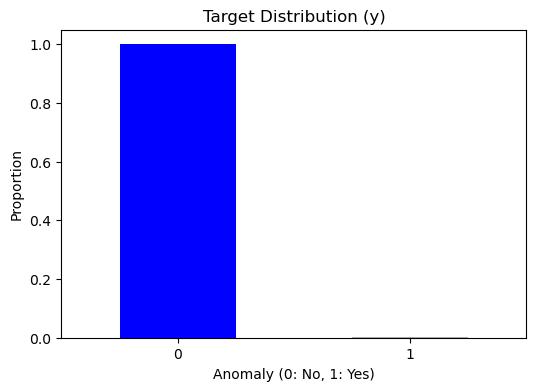

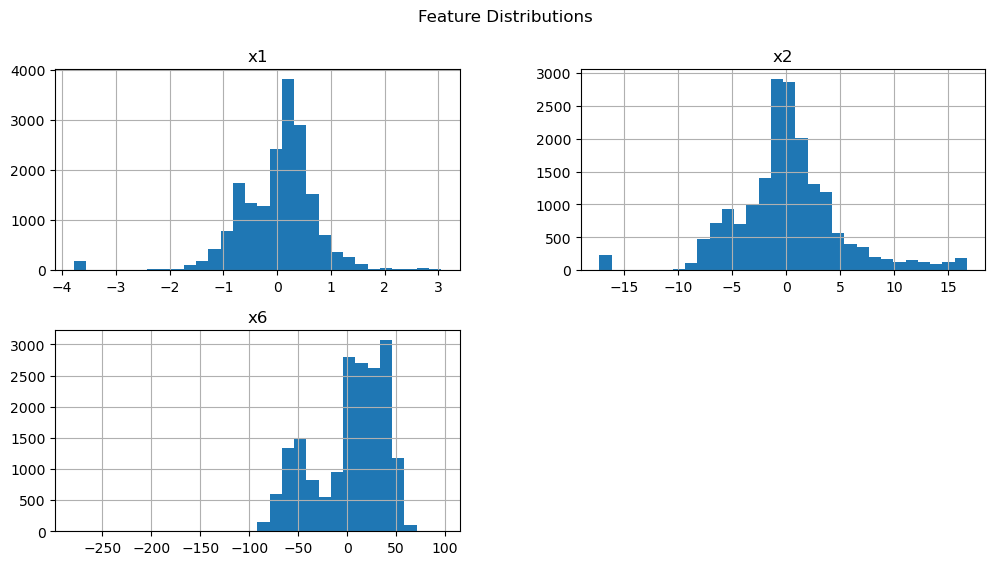

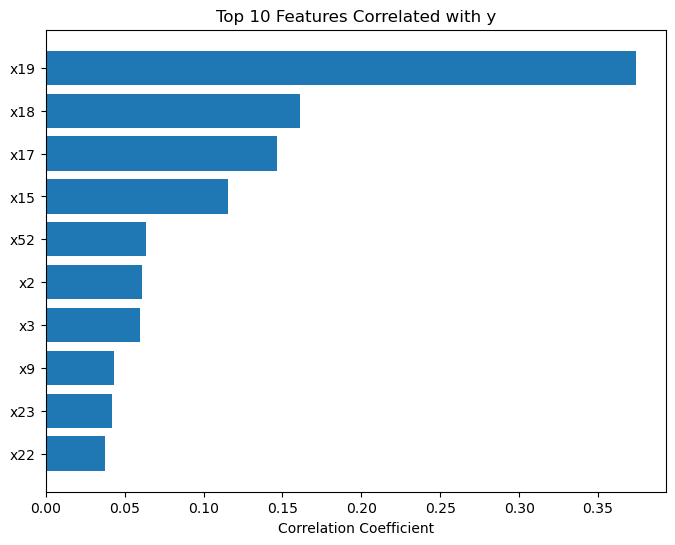

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3662
           1       1.00      1.00      1.00      3690

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352

ROC-AUC Score: 1.0


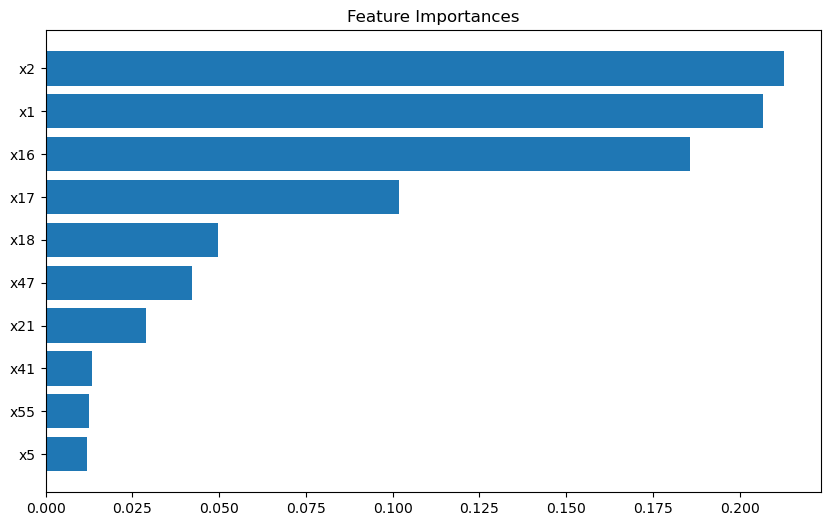

Top Features: ['x5', 'x55', 'x41', 'x21', 'x47', 'x18', 'x17', 'x16', 'x1', 'x2']


['scaler.pkl']

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load the data
data = pd.ExcelFile(r'C:\Users\sapta\Downloads\Automated anomaly detection for predictive maintenance using machine learning\anomadata-anomaly-detection\data\processed\AnomaData.xlsx')
df = data.parse('Sheet1')

# Data Inspection
df.info()
print(df.describe())

# EDA - Checking target distribution
plt.figure(figsize=(6, 4))
df['y'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])
plt.title('Target Distribution (y)')
plt.xlabel('Anomaly (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.savefig('target_distribution.png')
plt.show()

# Feature distributions (example)
df[['x1', 'x2', 'x6']].hist(bins=30, figsize=(12, 6))
plt.suptitle('Feature Distributions')
plt.savefig('feature_distributions.png')
plt.show()

# Correlation Matrix
corr_matrix = df.corr()
top_corr = corr_matrix['y'].abs().sort_values(ascending=False)[1:11]
plt.figure(figsize=(8, 6))
plt.barh(top_corr.index, top_corr.values)
plt.title('Top 10 Features Correlated with y')
plt.xlabel('Correlation Coefficient')
plt.gca().invert_yaxis()
plt.savefig('top_features_correlation.png')
plt.show()

# Feature and Target Separation
X = df.drop(columns=['y', 'time'])
y = df['y']

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Address Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Model Training - Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [df.columns[i] for i in indices])
plt.title("Feature Importances")
plt.savefig('feature_importances.png')
plt.show()

# Summary
print("Top Features:", [df.columns[i] for i in indices])

# Save Model and Scaler (Optional)
import joblib
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
